In [2]:
# globals for google colab ot not and others
run_on_colab = True
convert_notebook_to_py = False
copy_back_to_drive = False


In [3]:
if run_on_colab:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if run_on_colab:
  !mkdir -p /content/code/
  %cd /content/code/
  #!pwd

  path_to_hw3 = "/content/drive/MyDrive/studies/master/courses/spring_2020_2021/046746_computer_vision/hw_collab/hw3"
  hw3_code = path_to_hw3 + "/code"

  #ls_command = f"ls {hw3_code}"
  #!$ls_command

  cp_command = f"cp -r {hw3_code}/* ./"
  !$cp_command

  if convert_notebook_to_py:
    !jupyter nbconvert --to python Q1.ipynb --output Q1.py
  
  if copy_back_to_drive:
    cp_command = f"cp ./Q1.py {hw3_code}/"
    !$cp_command
  
  #!ls ./data


/content/code


In [5]:
# %% Imports

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import cv2
from skimage.segmentation import felzenszwalb,mark_boundaries
from shared_Q1_Q2 import *

# %% Q 1.1

# %% Loading images

frog1 = cv2.cvtColor(cv2.imread('./data/frogs/frog1.jpg'), cv2.COLOR_BGR2RGB)
frog2 = cv2.cvtColor(cv2.imread('./data/frogs/frog2.jpg'), cv2.COLOR_BGR2RGB)
horse1 = cv2.cvtColor(cv2.imread('./data/horses/horse1.png'), cv2.COLOR_BGR2RGB)
horse2 = cv2.cvtColor(cv2.imread('./data/horses/horse2.jpg'), cv2.COLOR_BGR2RGB)


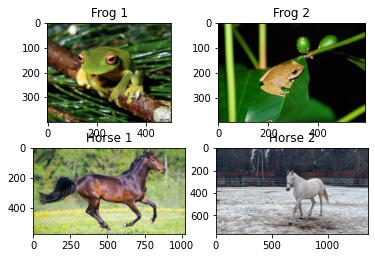

In [6]:

# %% Display images

plt.figure()
plt.subplot(2,2,1)
plt.imshow(frog1)
plt.title('Frog 1')
plt.subplot(2,2,2)
plt.imshow(frog2)
plt.title('Frog 2')
plt.subplot(2,2,3)
plt.imshow(horse1)
plt.title('Horse 1')
plt.subplot(2,2,4)
plt.imshow(horse2)
plt.title('Horse 2')
plt.show()

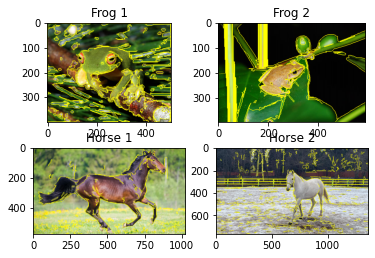

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


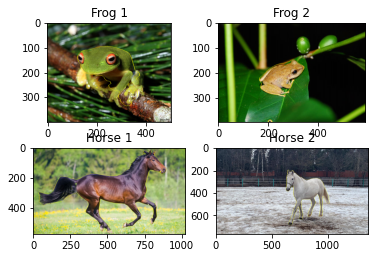

In [8]:
# %% Q1.2

# %% Classic method

frog1SegmentsFz = felzenszwalb(frog1, scale=300, sigma=1, min_size=50)
frog2SegmentsFz = felzenszwalb(frog2, scale=300, sigma=1, min_size=50)
horse1SegmentsFz = felzenszwalb(horse1, scale=500, sigma=1, min_size=100)
horse2SegmentsFz = felzenszwalb(horse2, scale=500, sigma=1, min_size=100)

# %% Display classic segmentation
plt.figure()
plt.subplot(2,2,1)
plt.imshow(mark_boundaries(frog1, frog1SegmentsFz))
plt.title('Frog 1')
plt.subplot(2,2,2)
plt.imshow(mark_boundaries(frog2, frog2SegmentsFz))
plt.title('Frog 2')
plt.subplot(2,2,3)
plt.imshow(mark_boundaries(horse1, horse1SegmentsFz))
plt.title('Horse 1')
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(horse2, horse2SegmentsFz))
plt.title('Horse 2')
plt.show()

# %% Deep learning method

# %% Prepearing the model
# load model
model=torch.hub.load('pytorch/vision:v0.5.0','deeplabv3_resnet101',pretrained=True)
# put in inference mode
model.eval()
# define device
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=model.to(device)

# %% Deep segmentation

frog1SegmentsDeep = DeepLabSegmentation(frog1,model,device,1)
frog2SegmentsDeep = DeepLabSegmentation(frog2,model,device,1)
horse1SegmentsDeep = DeepLabSegmentation(horse1,model,device,1)
horse2SegmentsDeep = DeepLabSegmentation(horse2,model,device,1)

# %% Display deep learning based segmentation

plt.figure()
plt.subplot(2,2,1)
plt.imshow(mark_boundaries(frog1, frog1SegmentsDeep))
plt.title('Frog 1')
plt.subplot(2,2,2)
plt.imshow(mark_boundaries(frog2, frog2SegmentsDeep))
plt.title('Frog 2')
plt.subplot(2,2,3)
plt.imshow(mark_boundaries(horse1, horse1SegmentsDeep))
plt.title('Horse 1')
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(horse2, horse2SegmentsDeep))
plt.title('Horse 2')

plt.show()

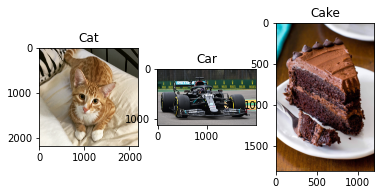

In [9]:
# %% Q1.3

# %% Loading our images

cat = cv2.cvtColor(cv2.imread('./my_data/cat.jpg'), cv2.COLOR_BGR2RGB)
car = cv2.cvtColor(cv2.imread('./my_data/car.jpg'), cv2.COLOR_BGR2RGB)
cake = cv2.cvtColor(cv2.imread('./my_data/cake.jpg'), cv2.COLOR_BGR2RGB)

# %% Display images

plt.figure()
plt.subplot(1,3,1)
plt.imshow(cat)
plt.title('Cat')
plt.subplot(1,3,2)
plt.imshow(car)
plt.title('Car')
plt.subplot(1,3,3)
plt.imshow(cake)
plt.title('Cake')
plt.show()

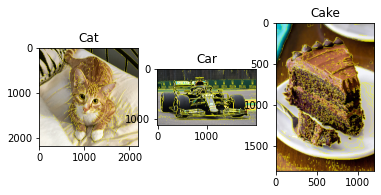

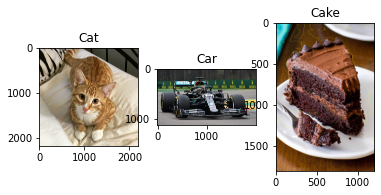

In [10]:
# %% Q 1.4

# %% Classical segmentation

catSegmentsFz = felzenszwalb(cat, scale=300, sigma=1, min_size=50)
carSegmentsFz = felzenszwalb(car, scale=300, sigma=1, min_size=50)
cakeSegmentsFz = felzenszwalb(cake, scale=300, sigma=1, min_size=50)

# %% Display classic segmentation
plt.figure()
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(cat, catSegmentsFz))
plt.title('Cat')
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(car, carSegmentsFz))
plt.title('Car')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(cake, cakeSegmentsFz))
plt.title('Cake')
plt.show()

# %% Deep segmentation

catSegmentsDeep = DeepLabSegmentation(cat,model,device,1)
carSegmentsDeep = DeepLabSegmentation(car,model,device,1)
cakeSegmentsDeep = DeepLabSegmentation(cake,model,device,1)

# %% Display deep segmentation
plt.figure()
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(cat, catSegmentsDeep))
plt.title('Cat')
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(car, carSegmentsDeep))
plt.title('Car')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(cake, cakeSegmentsDeep))
plt.title('Cake')
plt.show()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


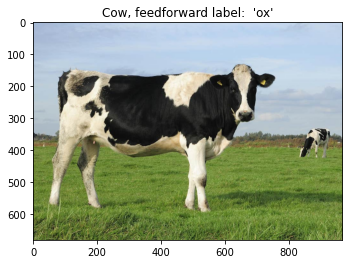

In [11]:
# %% Q 1.5 

# In report

# %% Q 1.6

# %% Load model

VGG16model = models.vgg16(pretrained=True, progress=True).to(device)
VGG16model.eval()

# %% Q 1.7

# %% Load image and plot image

cow = cv2.cvtColor(cv2.imread('./data/cow.jpg'), cv2.COLOR_BGR2RGB)

# %% VGG16 model prediction

def VGG16pred(input_image,model,device):
    input_batch = Preprocess(cow,device)
    with torch.no_grad():
        output=VGG16model(input_batch)
    output_predictions = output.argmax(1)
    output_label = output_predictions.cpu().numpy()
    return output_label[0]
    
cowLabel = VGG16pred(cow,VGG16model,device)

# %% Get label name from imagenet dataset

def GetLabelName(label):
    with open('./data/imagenet1000_clsidx_to_labels.txt') as f:
        lines = f.readlines()
    lines = ' '.join(lines)
    lines =lines.split(":")
    curLine = lines[label + 1]
    labelName = curLine.split(',')[0]
    return labelName

# %% Plot image

cowLabelName = GetLabelName(cowLabel)
plt.figure()
plt.imshow(cow)
plt.title('Cow, feedforward label: ' + str(cowLabelName))
plt.show()

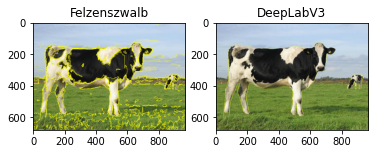

In [12]:
# %% Q 1.8

# %% Comparison between segmentation methods

cowSegmentsFz = felzenszwalb(cow, scale=300, sigma=1, min_size=50)
cowSegmentsDeep = DeepLabSegmentation(cow,model,device,1)

# %% Display classic segmentation

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(cow, cowSegmentsFz))
plt.title('Felzenszwalb')
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(cow, cowSegmentsDeep))
plt.title('DeepLabV3')
plt.show()

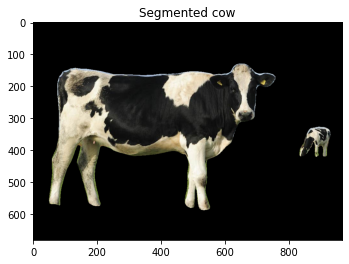

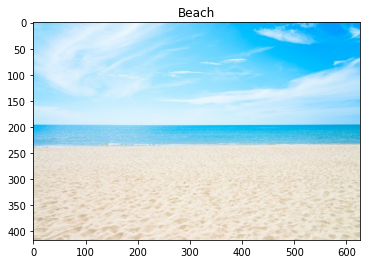

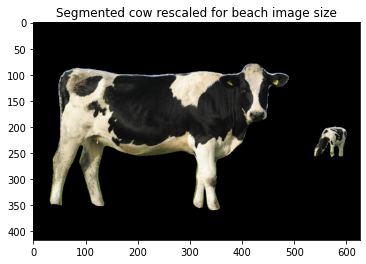

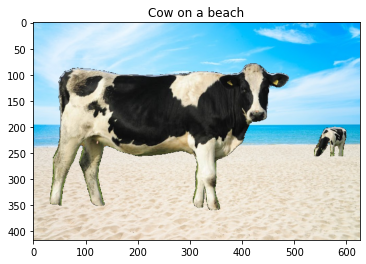

In [13]:
# %% Q 1.9

# %% Get cow segmentation
curClass = np.unique(cowSegmentsDeep)[1]
maskCow=np.zeros_like(cowSegmentsDeep)
maskCow[cowSegmentsDeep==curClass]=1

def cropWithRespectToMask(img,mask):
    imgCropped = np.zeros_like(img)
    for i in range(img.shape[-1]):
        imgCropped[:,:,i] = img[:,:,i] * mask
    return imgCropped
    
cowCropped = cropWithRespectToMask(cow,maskCow)

# %% Display segmented cow

plt.figure()
plt.imshow(cowCropped)
plt.title('Segmented cow')
plt.show()

# %% Load beach image

beach = cv2.cvtColor(cv2.imread('./data/beach.jpg'), cv2.COLOR_BGR2RGB)

# %% Display beach image

plt.figure()
plt.imshow(beach)
plt.title('Beach')
plt.show()

# %% Resize cropped cow

cowCroppedResized = cv2.resize(cowCropped,(beach.shape[1],beach.shape[0]))

plt.figure()
plt.imshow(cowCroppedResized)
plt.title('Segmented cow rescaled for beach image size')
plt.show()

# %% Merge beach and cows

beachAndCow = beach.copy()
maskInd = np.where(cowCroppedResized!=0)
for i in range(beachAndCow.shape[-1]):
    beachAndCow[maskInd[0],maskInd[1],i] = cowCroppedResized[maskInd[0],maskInd[1],i]

# %% Display cow on a beach

plt.figure()
plt.imshow(beachAndCow)
plt.title('Cow on a beach')
plt.show()

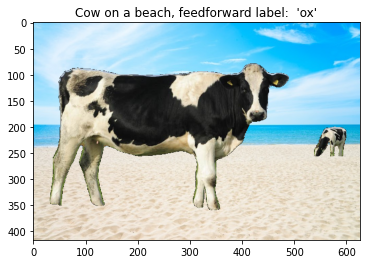

In [14]:
# %% Q1.10

# %% Cow on a beach VGG16

cowOnBeachLabel = VGG16pred(beachAndCow,VGG16model,device)
cowOnBeachLabelName = GetLabelName(cowOnBeachLabel)
plt.figure()
plt.imshow(beachAndCow)
plt.title('Cow on a beach, feedforward label: ' + str(cowOnBeachLabelName))
plt.show()